In [297]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (9).csv


In [298]:
from seaborn import heatmap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

1. Charger et explorer le dataset.

In [299]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


2. Vérifier la présence de valeurs manquantes et traiter si nécessaire.

In [300]:
#verifications des valeurs manquantes
df.isnull().sum()
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


3. Analyser la distribution des variables (histogrammes, statistiques descriptives).

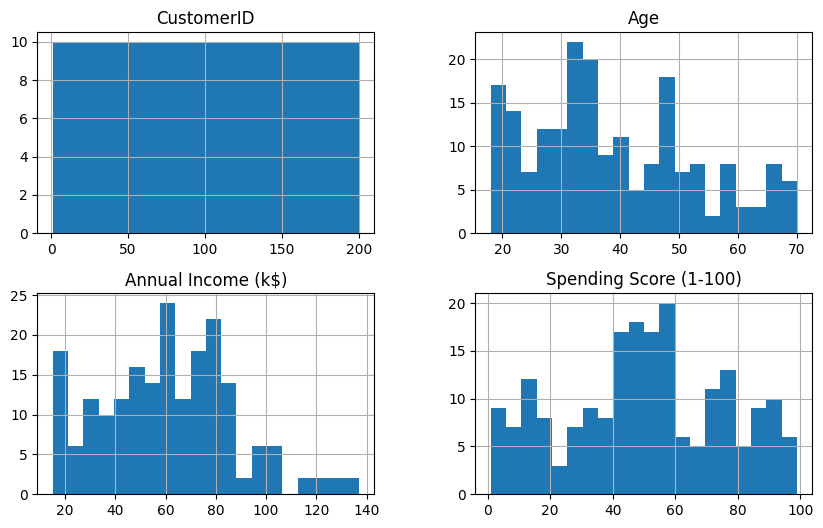

In [301]:
#analyse distribution des variables
df.hist(figsize=(10,6),bins= 20)
plt.show()

4. Sélectionner les variables pertinentes pour la segmentation (justifier votre choix).

In [302]:
#selectionner les variables pertinentes
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

print(X.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


justification : ce sont les variables reflétant comportement d’achat + profil socio-économique.

5. Normaliser et standardiser les variables retenues.

In [303]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



**Partie 2 – Analyse exploratoire **

1. Visualiser les relations entre les variables (scatter plots, pairplots, heatmap de
corrélation).

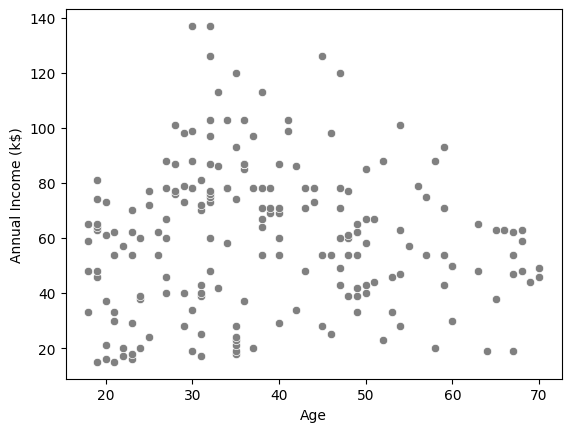

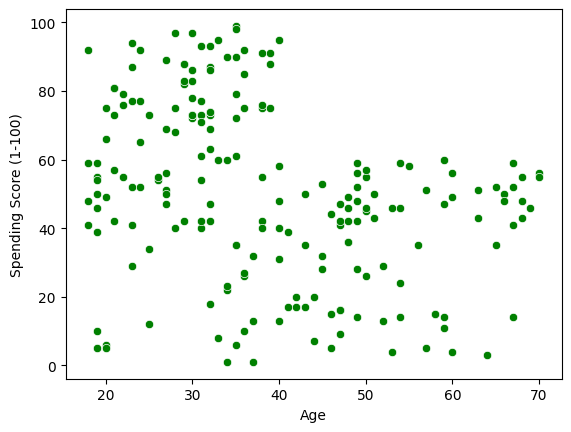

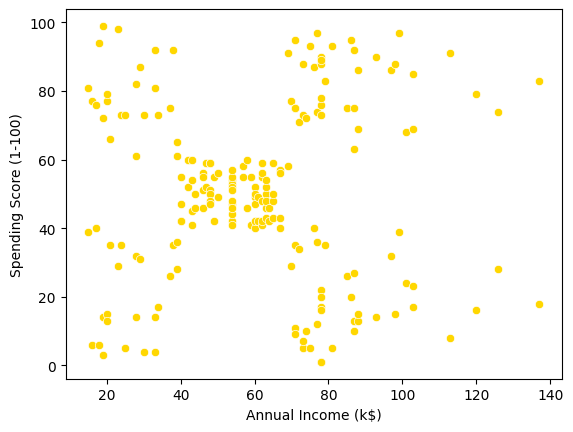

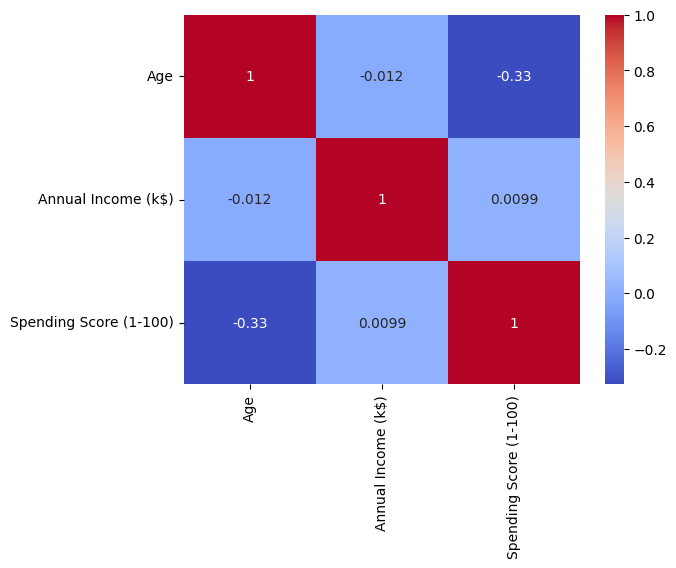

In [317]:
# Nuages de points séparés
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', color='grey')
plt.show()

sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', color='green')
plt.show()

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', color='gold')
plt.show()



sns.heatmap(df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(),
            annot=True, cmap="coolwarm")
plt.show()


2)Spending Score & Income semblent former des groupes visuels.

Possibles segments : haut revenu vs bas revenu, jeunes dépensiers vs âgés économes…

3)Hypothèse : nombre probable de clusters : 5



**Partie 3 – Application de K-Means **

1. Appliquer K-Means pour différents nombres de clusters (k= 2 à 10).

In [305]:
from sklearn.cluster import KMeans

inertias = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)



2. Utiliser la méthode du coude pour choisir le nombre optimal de clusters.

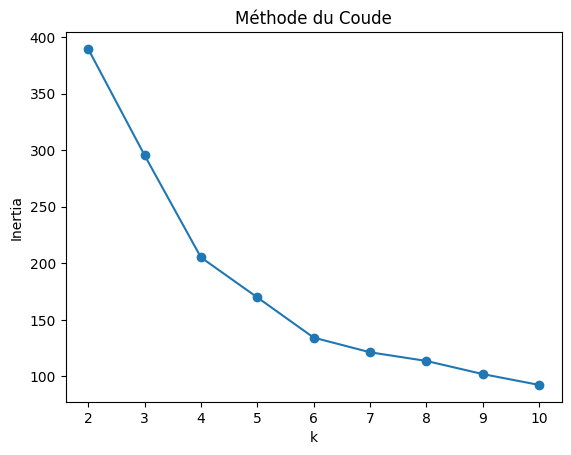

In [306]:
plt.plot(range(2,11), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Méthode du Coude')
plt.show()


3. Calculer le score de silhouette pour valider le choix de k.

In [307]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    print(k, silhouette_score(X_scaled, labels))


2 0.33547192894004574
3 0.3579234303882264
4 0.4039582785148566
5 0.40846873777345605
6 0.43106526216603014
7 0.410091114520974
8 0.3673663165322295
9 0.37442148555078425
10 0.36186970479722974


4. Entraîner le modèle final avec le k choisi.

In [308]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)



5. Ajouter une colonne “Cluster” au dataset avec les labels obtenus.

In [309]:
df['Cluster'] = labels


In [310]:
print(df.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        2  
1        2  
2        5  
3        2  
4        5  
5        2  
6        5  
7        2  
8        5  
9        2  


Partie 4 – Interprétation

1. Calculer la moyenne des variables par cluster.

In [311]:
df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.560000,26.480000,76.240000
3,26.125000,59.425000,44.450000
4,44.000000,90.133333,17.933333
5,45.523810,26.285714,19.380952


2. Décrire le profil typique de chaque segment (âge, revenu, score de dépense…).

Cluster 0 — Jeunes à haut score de dépense,
Cluster 1 — Revenus élevés mais faible dépense,
Cluster 2 — Clients moyens et équilibrés,
Cluster 3 — Bas revenu – Faible dépense,
Cluster 4 — Bas revenu – Forte dépense,
cluster 5 - Revenus élevés - Forte dépense,



3. Donner un nom ou une étiquette descriptive à chaque segment.


0	Jeunes bons clients,
1	Riches économes,
2	Classe moyenne,
3	Seniors économes,
4	Dépensiers faibles revenus,
5 Dépensiers fortes revenus,


4. Représenter les clusters par des visualisations 2D et 3D.

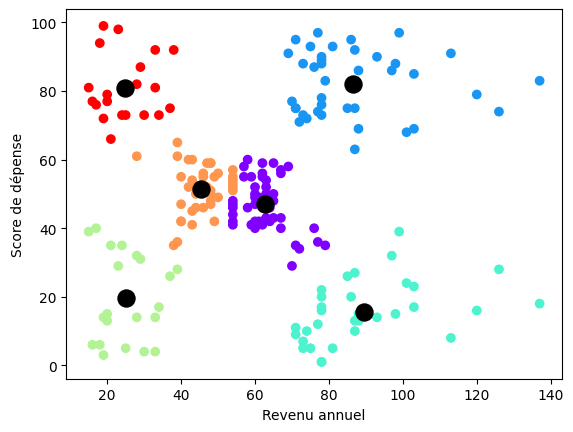

In [312]:




X_D = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#entrainement
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_D)
df['Cluster'] = kmeans.predict(X_D)

#scatter pour les colonnes
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='rainbow')

#scatter pour les centroides
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=150, c='black', marker='o')

plt.xlabel("Revenu annuel")
plt.ylabel("Score de dépense")
plt.show()



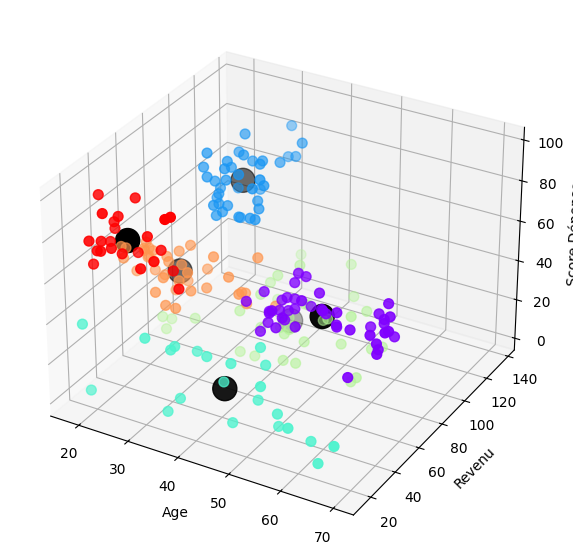

In [313]:

from mpl_toolkits.mplot3d import Axes3D

X_DD= df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]


kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_DD)
df['Cluster'] = kmeans.predict(X_DD)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

#scatter pour les colonnes
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],

           c=df['Cluster'],s=50, cmap='rainbow')

#scatter pour les centroides
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],
            s=300, c='black', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Revenu')
ax.set_zlabel('Score Dépense')
plt.show()